In [282]:
from bs4 import BeautifulSoup as bs

In [283]:
import requests

In [284]:
import pandas as pd

In [285]:
import numpy as np

In [286]:
import matplotlib.pyplot as plt

In [287]:
import seaborn as sns

Web scraping hardware (game platforms) sales data from VGChartz.com

In [288]:
r = requests.get('https://www.vgchartz.com/analysis/platform_totals/Hardware/Global/')

In [289]:
vg_sales = bs(r.content, 'lxml')

In [290]:
table = vg_sales.find("table", { "id" : "myTable" })

In [291]:
bs(table.text)

<html><body><p>Pos
Platform
North America
Europe
Japan
Rest of World
Global




1
PlayStation 2 (PS2)
53.65
55.28
23.18
25.57
157.68


2
Nintendo DS (DS)
57.39
52.07
33.01
12.43
154.90


3
Game Boy (GB)
43.18
40.05
32.47
2.99
118.69


4
PlayStation 4 (PS4)
38.14
48.09
9.36
19.99
115.58


5
PlayStation (PS)
40.78
31.09
21.59
9.04
102.50


6
Wii (Wii)
45.51
33.88
12.77
9.48
101.64


7
PlayStation 3 (PS3)
29.42
34.99
10.47
12.53
87.41


8
Xbox 360 (X360)
49.11
25.87
1.66
9.16
85.80


9
Nintendo Switch (NS)
32.14
22.21
19.92
11.43
85.70


10
Game Boy Advance (GBA)
40.39
21.31
16.96
2.85
81.51


11
PlayStation Portable (PSP)
21.41
24.41
20.01
15.26
81.09


12
Nintendo 3DS (3DS)
25.77
21.07
24.65
4.44
75.93


13
Nintendo Entertainment System (NES)
33.49
8.30
19.35
0.77
61.91


14
Xbox One (XOne)
32.13
12.39
0.12
5.46
50.10


15
Super Nintendo Entertainment System (SNES)
22.88
8.15
17.17
0.90
49.10


16
Nintendo 64 (N64)
20.11
6.35
5.54
0.93
32.93


17
Sega Genesis (GEN)
16.98
8.39
3.58
0.59


In [292]:
table_body = table.find('tbody')

In [293]:
data = []

In [294]:
rows = table_body.find_all('tr')

In [295]:
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values

In [296]:
df = pd.DataFrame(data)

In [297]:
df.to_csv('console_sales.csv') # Saving the scraped data to a CSV file.

In [298]:
console_sales = pd.read_csv('console_sales.csv')

In [299]:
console_sales.head()

,Unnamed: 0,0,1,2,3,4,5,6
0,0,1,PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68
1,1,2,Nintendo DS (DS),57.39,52.07,33.01,12.43,154.90
2,2,3,Game Boy (GB),43.18,40.05,32.47,2.99,118.69
3,3,4,PlayStation 4 (PS4),38.14,48.09,9.36,19.99,115.58
4,4,5,PlayStation (PS),40.78,31.09,21.59,9.04,102.50


Dropping unnecessary columns and renaming the columns

In [300]:
del(console_sales["Unnamed: 0"])

In [301]:
del(console_sales["0"])

In [302]:
console_sales.head()

,1,2,3,4,5,6
0,PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68
1,Nintendo DS (DS),57.39,52.07,33.01,12.43,154.90
2,Game Boy (GB),43.18,40.05,32.47,2.99,118.69
3,PlayStation 4 (PS4),38.14,48.09,9.36,19.99,115.58
4,PlayStation (PS),40.78,31.09,21.59,9.04,102.50


In [303]:
console_sales.columns = ['Platform', 'North America', 'Europe', 'Japan', 'Rest of World', 'Global']

Setting the gaming platforms as the index

In [304]:
console_sales = console_sales.set_index("Platform")

In [305]:
console_sales.head()

,North America,Europe,Japan,Rest of World,Global
Platform,,,,,
PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68
Nintendo DS (DS),57.39,52.07,33.01,12.43,154.90
Game Boy (GB),43.18,40.05,32.47,2.99,118.69
PlayStation 4 (PS4),38.14,48.09,9.36,19.99,115.58
PlayStation (PS),40.78,31.09,21.59,9.04,102.50


Exploring above dataset

In [306]:
print(console_sales.describe())

       North America     Europe      Japan  Rest of World      Global
count      36.000000  36.000000  36.000000      36.000000   36.000000
mean       19.031111  13.562500   8.260000       4.222222   45.075833
std        18.294966  16.565696  10.093689       6.374593   47.422795
min         0.000000   0.000000   0.000000       0.000000    0.000000
25%         2.437500   0.840000   0.037500       0.052500    4.832500
50%        16.375000   5.795000   3.455000       0.885000   26.145000
75%        32.477500  22.760000  17.012500       6.355000   82.557500
max        57.390000  55.280000  33.010000      25.570000  157.680000


In [307]:
print(console_sales.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, PlayStation 2 (PS2) to TurboGrafx-16 (TG16)
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   North America  36 non-null     float64
 1   Europe         36 non-null     float64
 2   Japan          36 non-null     float64
 3   Rest of World  36 non-null     float64
 4   Global         36 non-null     float64
dtypes: float64(5)
memory usage: 1.7+ KB
None


In [308]:
console_sales.shape

(36, 5)

Loading the dataframe for video game sales 2020

In [309]:
vgsales = pd.read_csv("vgchartz-7_7_2020.csv")

In [310]:
vgsales.head()

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,3,/games/boxart/full_3351915AmericaFrontccc.jpg,Warriors,Series,Action,Unknown,Omega Force,NaN,NaN,NaN,42.06,NaN,NaN,NaN,NaN,NaN,NaN,24/03/2020
1,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,22/03/2005,04/03/2020
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,16/10/2001,03/02/2020
3,6,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12,17/09/2013,NaN
4,7,/games/boxart/full_6800951AmericaFrontccc.jpg,Frogger,Series,Action,Konami,Konami|Parker Brothers|SCE Cambridge Studio|Bl...,NaN,NaN,NaN,20.00,NaN,NaN,NaN,NaN,NaN,23/10/1981,26/02/2020


In [311]:
vgsales.columns = ["Unsed", "img", "Name", "Platform", "Genre", "Publisher", "Developer", "VG_Score", "Critic_Score", "User_Score", "Total_Shipped", "Total_Sales", "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales", "Release_Date", "Last_Update"]

In [312]:
def cust_func():
    print("There are " + str(vgsales.shape[0]) + " rows and " + str(vgsales.shape[1]) + " columns.")
    return vgsales.shape

In [313]:
print(cust_func())

There are 57950 rows and 18 columns.
(57950, 18)


In [314]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57950 entries, 0 to 57949
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unsed          57950 non-null  int64  
 1   img            57950 non-null  object 
 2   Name           57950 non-null  object 
 3   Platform       57950 non-null  object 
 4   Genre          57950 non-null  object 
 5   Publisher      57950 non-null  object 
 6   Developer      57933 non-null  object 
 7   VG_Score       984 non-null    float64
 8   Critic_Score   6544 non-null   float64
 9   User_Score     386 non-null    float64
 10  Total_Shipped  2373 non-null   float64
 11  Total_Sales    19319 non-null  float64
 12  NA_Sales       12900 non-null  float64
 13  JP_Sales       6993 non-null   float64
 14  EU_Sales       13111 non-null  float64
 15  Other_Sales    15440 non-null  float64
 16  Release_Date   54296 non-null  object 
 17  Last_Update    11763 non-null  object 
dtypes: flo

In [315]:
vgsales["Platform"].unique()

array(['Series', 'PS3', 'PS4', 'PS2', 'X360', 'PC', 'XOne', 'PSP', 'PS',
       'Wii', 'DS', '3DS', 'NES', 'GC', 'WiiU', 'XB', 'N64', 'GEN',
       '2600', 'GBA', 'GB', 'PSV', 'SNES', 'DC', 'NS', 'SAT', 'XBL',
       'PSN', 'And', 'DSiW', 'OSX', 'Lynx', 'SCD', 'Linux', 'MS', 'WW',
       'ZXS', 'ACPC', 'Amig', '7800', 'VC', 'GG', 'DSi', 'PCE', '5200',
       'AJ', 'WinP', 'Mob', 'iQue', 'iOS', 'WS', 'NG', 'GIZ', '3DO', 'VB',
       'GBC', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'PCFX', 'Int', 'XSX',
       'PS5', 'C128', 'CDi', 'CD32', 'Arc', 'C64', 'BRW', 'FMT', 'MSX',
       'BBCM', 'ApII', 'Aco', 'TG16'], dtype=object)

Delete unneccesary columns and set a column as index

In [316]:
print(cust_func())

There are 57950 rows and 18 columns.
(57950, 18)


Subsetting data on popular platforms released from 2000-2020 only

In [317]:
vgsales = vgsales.set_index(["Platform"])

In [318]:
vgsales = vgsales.loc[["PS2", "PS3", "PS4", "PS5", "PSP", "PSV", "PSN", "GC", "XB", "XBL", "X360", "XOne", "XSX", "DS", "3DS", "NS", "Wii", "WiiU"]]

Slicing dataset and replace missing values

In [319]:
vgsales = vgsales.loc[:, "Name":"Release_Date"]

In [320]:
del(vgsales["Total_Shipped"])

In [321]:
del(vgsales["VG_Score"])

In [322]:
del(vgsales["Developer"])

In [323]:
vgsales.head()

,Name,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date
Platform,,,,,,,,,,,
PS2,Grand Theft Auto: San Andreas,Action,Rockstar Games,9.5,NaN,NaN,NaN,NaN,NaN,NaN,26/10/2004
PS2,Grand Theft Auto: Vice City,Action,Rockstar Games,9.6,NaN,16.15,8.41,0.47,5.49,1.78,28/10/2002
PS2,Grand Theft Auto III,Action,Rockstar Games,9.5,NaN,13.10,6.99,0.30,4.51,1.30,23/10/2001
PS2,Metal Gear Solid 2: Sons of Liberty,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001
PS2,The Lord of the Rings: The Two Towers,Action,Electronic Arts,8.3,NaN,4.67,1.94,0.08,1.95,0.70,21/10/2002


In [324]:
print(cust_func())

There are 27615 rows and 11 columns.
(27615, 11)


Checking for and filling in missing values

In [325]:
vgsales.isna().sum()

Name                0
Genre               0
Publisher           0
Critic_Score    23272
User_Score      27298
Total_Sales     13006
NA_Sales        17353
JP_Sales        21775
EU_Sales        18264
Other_Sales     16446
Release_Date     1775
dtype: int64

Make a bar chart on missing values

<AxesSubplot:>

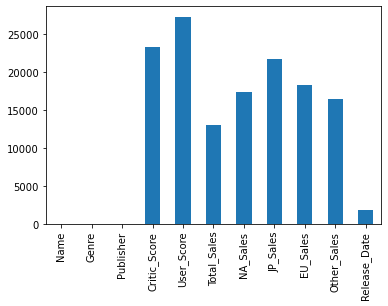

In [326]:
vgsales.isna().sum().plot(kind="bar")

In [327]:
vgsales_final = vgsales.dropna(subset=["Release_Date"])

In [328]:
vgsales_final = vgsales_final.drop_duplicates()

In [329]:
vg_av = vgsales_final.dropna()

In [330]:
vg_av.mean()

Critic_Score    8.073267
User_Score      8.542574
Total_Sales     2.173762
NA_Sales        1.134653
JP_Sales        0.150396
EU_Sales        0.638713
Other_Sales     0.249703
dtype: float64

In [331]:
vgsales_final = vgsales_final.fillna({"Critic_Score":8.0, "User_Score":8.5, "NA_Sales":1.1, "JP_Sales":0.2, "EU_Sales":0.6, "Other_Sales":0.2})

In [332]:
vgsales_final.isna().sum()

Name                0
Genre               0
Publisher           0
Critic_Score        0
User_Score          0
Total_Sales     10203
NA_Sales            0
JP_Sales            0
EU_Sales            0
Other_Sales         0
Release_Date        0
dtype: int64

In [333]:
vgsales_final.head()

,Name,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date
Platform,,,,,,,,,,,
PS2,Grand Theft Auto: San Andreas,Action,Rockstar Games,9.5,8.5,NaN,1.10,0.20,0.60,0.20,26/10/2004
PS2,Grand Theft Auto: Vice City,Action,Rockstar Games,9.6,8.5,16.15,8.41,0.47,5.49,1.78,28/10/2002
PS2,Grand Theft Auto III,Action,Rockstar Games,9.5,8.5,13.10,6.99,0.30,4.51,1.30,23/10/2001
PS2,Metal Gear Solid 2: Sons of Liberty,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001
PS2,The Lord of the Rings: The Two Towers,Action,Electronic Arts,8.3,8.5,4.67,1.94,0.08,1.95,0.70,21/10/2002


In [334]:
vgsales_final = vgsales_final.reset_index()

In [335]:
vgsales_final.head()

,Platform,Name,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date
0,PS2,Grand Theft Auto: San Andreas,Action,Rockstar Games,9.5,8.5,NaN,1.10,0.20,0.60,0.20,26/10/2004
1,PS2,Grand Theft Auto: Vice City,Action,Rockstar Games,9.6,8.5,16.15,8.41,0.47,5.49,1.78,28/10/2002
2,PS2,Grand Theft Auto III,Action,Rockstar Games,9.5,8.5,13.10,6.99,0.30,4.51,1.30,23/10/2001
3,PS2,Metal Gear Solid 2: Sons of Liberty,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001
4,PS2,The Lord of the Rings: The Two Towers,Action,Electronic Arts,8.3,8.5,4.67,1.94,0.08,1.95,0.70,21/10/2002


In [336]:
vgsales_final.shape

(24601, 12)

Loading third dataset for merging later

In [337]:
games_sales = pd.read_csv("Video_Games.csv")

In [338]:
games_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
games_sales.shape

(16719, 16)

In [340]:
games_sales["Rating"].isna().sum()

6769

In [341]:
games_sales = games_sales.dropna(subset=["Rating"])

In [342]:
games_sales = games_sales.drop_duplicates()

In [343]:
games_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [344]:
games_sales = games_sales[["Name", "Platform", "Rating"]]

In [345]:
games_sales.head()

,Name,Platform,Rating
0,Wii Sports,Wii,E
2,Mario Kart Wii,Wii,E
3,Wii Sports Resort,Wii,E
6,New Super Mario Bros.,DS,E
7,Wii Play,Wii,E


In [346]:
vgsales_merged = vgsales_final.merge(games_sales, on=['Platform', 'Name'], how='left')

In [347]:
vgsales_merged.head()

,Platform,Name,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date,Rating
0,PS2,Grand Theft Auto: San Andreas,Action,Rockstar Games,9.5,8.5,NaN,1.10,0.20,0.60,0.20,26/10/2004,M
1,PS2,Grand Theft Auto: Vice City,Action,Rockstar Games,9.6,8.5,16.15,8.41,0.47,5.49,1.78,28/10/2002,M
2,PS2,Grand Theft Auto III,Action,Rockstar Games,9.5,8.5,13.10,6.99,0.30,4.51,1.30,23/10/2001,M
3,PS2,Metal Gear Solid 2: Sons of Liberty,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001,M
4,PS2,The Lord of the Rings: The Two Towers,Action,Electronic Arts,8.3,8.5,4.67,1.94,0.08,1.95,0.70,21/10/2002,T


In [348]:
vgsales_merged.shape

(24603, 13)

In [349]:
vgsales_merged.isna().sum()

Platform            0
Name                0
Genre               0
Publisher           0
Critic_Score        0
User_Score          0
Total_Sales     10203
NA_Sales            0
JP_Sales            0
EU_Sales            0
Other_Sales         0
Release_Date        0
Rating          16422
dtype: int64

In [350]:
vgsales_merged["Rating"].fillna("Unknown", inplace=True)

In [351]:
vgsales_merged = vgsales_merged.set_index("Name")

In [352]:
vgsales_merged.head()

,Platform,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date,Rating
Name,,,,,,,,,,,,
Grand Theft Auto: San Andreas,PS2,Action,Rockstar Games,9.5,8.5,NaN,1.10,0.20,0.60,0.20,26/10/2004,M
Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,9.6,8.5,16.15,8.41,0.47,5.49,1.78,28/10/2002,M
Grand Theft Auto III,PS2,Action,Rockstar Games,9.5,8.5,13.10,6.99,0.30,4.51,1.30,23/10/2001,M
Metal Gear Solid 2: Sons of Liberty,PS2,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001,M
The Lord of the Rings: The Two Towers,PS2,Action,Electronic Arts,8.3,8.5,4.67,1.94,0.08,1.95,0.70,21/10/2002,T


In [353]:
vgsales_merged["Total_Sales"] = vgsales_merged["NA_Sales"] + vgsales_merged["JP_Sales"] + vgsales_merged["EU_Sales"] + vgsales_merged["Other_Sales"]

In [354]:
vgsales_merged.isna().sum()

Platform        0
Genre           0
Publisher       0
Critic_Score    0
User_Score      0
Total_Sales     0
NA_Sales        0
JP_Sales        0
EU_Sales        0
Other_Sales     0
Release_Date    0
Rating          0
dtype: int64

In [355]:
vgsales_merged.head()

,Platform,Genre,Publisher,Critic_Score,User_Score,Total_Sales,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Release_Date,Rating
Name,,,,,,,,,,,,
Grand Theft Auto: San Andreas,PS2,Action,Rockstar Games,9.5,8.5,2.10,1.10,0.20,0.60,0.20,26/10/2004,M
Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,9.6,8.5,16.15,8.41,0.47,5.49,1.78,28/10/2002,M
Grand Theft Auto III,PS2,Action,Rockstar Games,9.5,8.5,13.10,6.99,0.30,4.51,1.30,23/10/2001,M
Metal Gear Solid 2: Sons of Liberty,PS2,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001,M
The Lord of the Rings: The Two Towers,PS2,Action,Electronic Arts,8.3,8.5,4.67,1.94,0.08,1.95,0.70,21/10/2002,T


Plots to look at sales by platform

<AxesSubplot:xlabel='count', ylabel='Platform'>

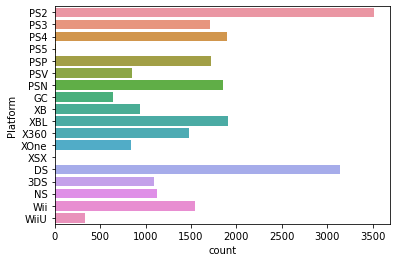

In [384]:
sns.countplot(data=vgsales_merged, y="Platform") # How many games in each platform on the DataFrame

In [386]:
platform_sales = vgsales_merged.groupby("Platform")["Total_Sales"].mean()

<AxesSubplot:title={'center':'Mean Video Game Sales by Platform'}, xlabel='Platform', ylabel='Total Sales'>

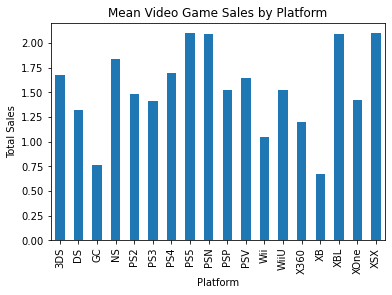

In [387]:
platform_sales.plot(kind="bar", ylabel="Total Sales", title="Mean Video Game Sales by Platform")

In [357]:
console_sales = console_sales.loc[["PlayStation 2 (PS2)", "PlayStation 3 (PS3)", "PlayStation 4 (PS4)", "PlayStation 5 (PS5)", "PlayStation Portable (PSP)", "PlayStation Vita (PSV)", "Xbox (XB)", "Xbox 360 (X360)", "Xbox One (XOne)", "Xbox Series X/S (XS)", "GameCube (GC)", "Nintendo DS (DS)", "Nintendo 3DS (3DS)", "Nintendo Switch (NS)", "Wii (Wii)", "Wii U (WiiU)"]]

In [358]:
console_sales = console_sales.reset_index()

In [359]:
for lab, row in console_sales.iterrows():
    if "PS" in str(row["Platform"]):
        console_sales.loc[lab, "Company"] = "Sony"
    elif "X" in str(row["Platform"]):
        console_sales.loc[lab, "Company"] = "Microsoft"
    else :
        console_sales.loc[lab, "Company"] = "Nintendo"

In [385]:
console_sales[["Platform", "Company"]]

,Platform,Company
0,PlayStation 2 (PS2),Sony
1,PlayStation 3 (PS3),Sony
2,PlayStation 4 (PS4),Sony
3,PlayStation 5 (PS5),Sony
4,PlayStation Portable (PSP),Sony
5,PlayStation Vita (PSV),Sony
6,Xbox (XB),Microsoft
7,Xbox 360 (X360),Microsoft
8,Xbox One (XOne),Microsoft
9,Xbox Series X/S (XS),Microsoft


Plot on critic scores vs total sales (and user scores as comparison)

Text(0, 0.5, 'Total Sales')

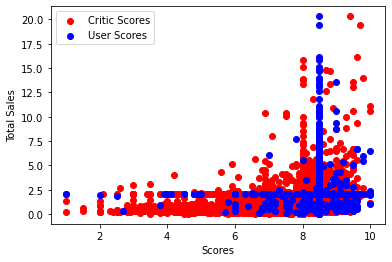

In [361]:
critic_scores = vgsales_merged["Critic_Score"]
user_scores = vgsales_merged["User_Score"]
fig, ax = plt.subplots()
ax.scatter(critic_scores, vgsales_merged["Total_Sales"], color="red", label="Critic Scores")
ax.scatter(user_scores, vgsales_merged["Total_Sales"], color="blue", label="User Scores")
ax.legend()
ax.set_xlabel("Scores")
ax.set_ylabel("Total Sales")

In [362]:
plt.show()

Genres vs total sales

In [363]:
Genre_sales = vgsales_merged.groupby("Genre")["Total_Sales"].mean()

In [364]:
print(Genre_sales)

Genre
Action              1.437309
Action-Adventure    1.500524
Adventure           1.595112
Board Game          1.956000
Education           1.495000
Fighting            1.434527
MMO                 1.530000
Misc                1.699017
Music               1.368663
Party               1.581719
Platform            1.406156
Puzzle              1.620278
Racing              1.181652
Role-Playing        1.569794
Sandbox             2.047500
Shooter             1.615701
Simulation          1.352455
Sports              1.300726
Strategy            1.584458
Visual Novel        1.902088
Name: Total_Sales, dtype: float64


<AxesSubplot:title={'center':'Mean Video Game Sales by Genre'}, xlabel='Genre', ylabel='Total Sales'>

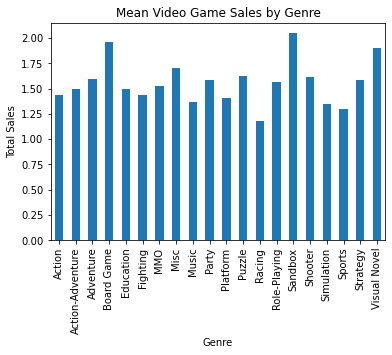

In [365]:
Genre_sales.plot(kind="bar", ylabel="Total Sales", title="Mean Video Game Sales by Genre")

Top publishers from top 100 games in the DataFrame

In [366]:
publishers = vgsales_merged.sort_values("Total_Sales", ascending=False)

In [380]:
publishers = publishers.iloc[:100, :]

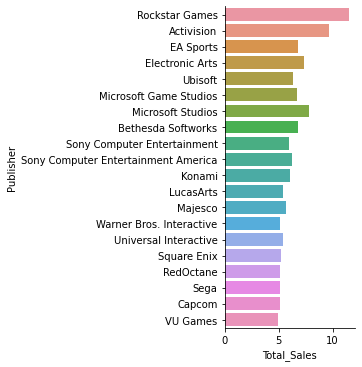

In [383]:
sns.catplot(x="Total_Sales", y="Publisher", data=publishers, kind='bar', ci=None)

Video game sales by age rating

In [391]:
console_sales

,Platform,North America,Europe,Japan,Rest of World,Global,Company
0,PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68,Sony
1,PlayStation 3 (PS3),29.42,34.99,10.47,12.53,87.41,Sony
2,PlayStation 4 (PS4),38.14,48.09,9.36,19.99,115.58,Sony
3,PlayStation 5 (PS5),3.70,2.88,0.73,1.13,8.44,Sony
4,PlayStation Portable (PSP),21.41,24.41,20.01,15.26,81.09,Sony
5,PlayStation Vita (PSV),2.64,5.24,5.92,2.41,16.21,Sony
6,Xbox (XB),15.77,7.17,0.53,1.18,24.65,Microsoft
7,Xbox 360 (X360),49.11,25.87,1.66,9.16,85.80,Microsoft
8,Xbox One (XOne),32.13,12.39,0.12,5.46,50.10,Microsoft
9,Xbox Series X/S (XS),2.78,1.47,0.05,0.71,5.01,Microsoft
